https://scipy-cookbook.readthedocs.io/items/Reading_mat_files.html

In [56]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import cv2

In [50]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [47]:
orig_png_path = './data/HED-BSDS/test/2018.jpg'
a = plt.imread(orig_png_path)

In [62]:
width = a.shape[1]
height = a.shape[0]
dim = (width, height)
print(a_size)

(481, 321, 3)


In [54]:
dim = (a_size[0], a_size[1])

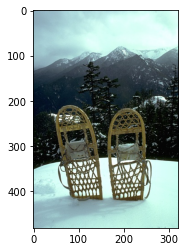

In [51]:
plt.imshow(a)

#### Loading an image we reconstructed

In [28]:
x = loadmat('./recombined_no_filter_mat/2018.mat')
x

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Dec 13 01:54:34 2020',
 '__version__': '1.0',
 '__globals__': [],
 'result': array([[ 3.4063822e-03,  2.9988465e-04,  4.0445984e-03, ...,
          1.5840060e-03,  4.8519797e-03,  1.7762400e-03],
        [-6.3821604e-04,  7.6893202e-06, -5.0749735e-04, ...,
          3.9984618e-04, -2.2299103e-04,  5.1518640e-04],
        [ 3.6755095e-03,  7.6893502e-04,  3.9292579e-03, ...,
          7.9200300e-04,  4.5520952e-03,  1.7224144e-03],
        ...,
        [ 3.5371014e-04,  6.3052675e-04, -7.6893502e-06, ...,
          2.1530180e-04,  4.2291413e-04,  6.9973076e-04],
        [ 2.2299115e-03,  6.6128414e-04,  1.9607844e-03, ...,
          6.3821604e-04,  2.5374857e-03,  9.8423683e-04],
        [ 8.7658589e-04,  1.0918877e-03,  8.9965388e-04, ...,
          5.4594385e-04,  7.3817762e-04,  7.8431366e-04]], dtype=float32)}

In [30]:
x['result'].shape

(482, 322)

This is obviously the wrong shape. We should resize to original size.

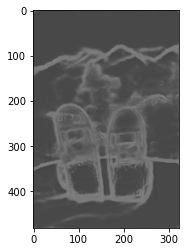

In [57]:
plt.imshow(x['result'], cmap = 'gray')

In [63]:
x_resized = cv2.resize(x['result'], dim, interpolation = cv2.INTER_CUBIC)

In [64]:
x_resized.shape

(481, 321)

#### Loading the test image we are going to compare this with

In [14]:
path = './data/BSDS500/BSDS500/data/groundTruth/test'

In [17]:
y = loadmat(path + '/2018.mat')

In [35]:
y

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Oct 29 09:24:02 2009',
 '__version__': '1.0',
 '__globals__': [],
 'groundTruth': array([[array([[(array([[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [36, 36, 36, ..., 36, 36, 36],
        [36, 36, 36, ..., 36, 36, 36],
        [36, 36, 36, ..., 36, 36, 36]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))]],
       dtype=[('Segmentation', 'O'), ('Boundaries', 'O')]),
         array([[(array([[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [11, 11, 11, ..., 11, 11, 11],
        [11, 11, 11, ..., 11, 11, 11],
        [11, 11, 11, ..., 11, 11, 11]], dtype=uint16), 

In [34]:
y['groundTruth'].shape

(1, 5)

y is very weird. Is our saving procedure correct at all. Must check.  
For checking this, we should load a mat we produced automatically using the test script.  
Importing that image.

In [19]:
path2 = './output_HL/epoch-4-test/mat/2018.mat'

In [20]:
z = loadmat(path2)

In [24]:
z_result = z['result']

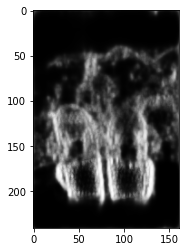

In [26]:
plt.imshow(z_result, cmap = 'gray')

In [27]:
z_result.shape

(241, 161)